## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

# [作業目標]
- 仿造範例的MAE函數, 自己寫一個MSE函數(參考上面公式)

# [作業重點]
- 注意程式的縮排
- 是否能將數學公式, 轉換為 Python 的函式組合? (In[2], Out[2])

In [1]:
# 載入基礎套件與代稱
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

# 定義 mean_squared_error 這個函數, 計算並傳回 MSE
def mean_squared_error(y, yp):
    mse = MSE = sum((y - yp) ** 2) / len(y)
    return mse

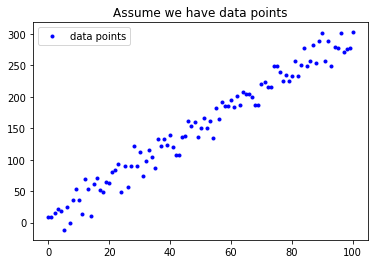

In [3]:
# 與範例相同, 不另外解說
w = 3
b = 0.5
x_lin = np.linspace(0, 100, 101)
y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

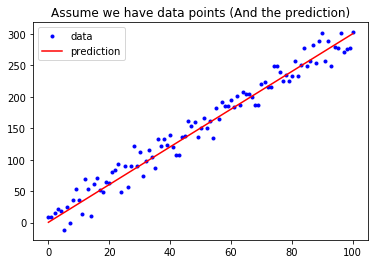

In [4]:
# 與範例相同, 不另外解說
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [5]:
# 執行 Function, 確認有沒有正常執行
MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

The Mean squared error is 255.846
The Mean absolute error is 13.249


# [作業2]

請上 Kaggle, 在 Competitions 或 Dataset 中找一組競賽或資料並寫下：

## Deepfake Detection Challenge
簡稱[DFDC](https://www.kaggle.com/c/deepfake-detection-challenge/overview)

1. 你選的這組資料為何重要

這個competition是由AWS, Facebook, Microsoft, the Partnership on AI’s Media Integrity Steering Committee聯合舉辦，

旨在邀集各方好手打造能辨識AI技術造假影片的科技。

由於在2017年Reddit網站用戶「deepfakes」提出了這個opensource的技術，

從此Facebook、Reddit還有各大社群網站開始有用deepfake製作的影片在流傳，

近來的一項研究表明，目前網上有14678個DeepFake視頻，其中96%是色情視頻。

技術的革新也讓詐騙業不斷改頭換面。deepfake可以合成人像、合成語音乃至合成筆跡，讓欺詐活動變得更加隱秘而難以偵查和防衛。

因此雖然各大網站幾乎都禁止deepfake製作的影像、聲音，但是人的肉眼仍是難以分辨，

這是一款based on GAN(generative adversarial network)的技術，

比賽任務大概就是要train一個類似GAN中discriminator的角色，

讓我們可以藉由ML來判斷一段影片或聲音到底是或不是deepfake的產物。

- - -

2. 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)

其中manipulated是由Facebook和合作廠商發佈數萬個包含真實未處理以及利用AI產出的Deepfake影片、音訊及其他檔。

而realistic的部分是由廠商付錢給同意參加這個competition的個人創作者買來的，

- - -

3. 蒐集而來的資料型態為何

Raw data為MP4影片檔，屬於Unstructured Data，

label則直接寫在file name上面。

| Columns | 解釋 |
| :---: | :---: |
| filename | the filename of the video|
| label|whether the video is REAL or FAKE|
| original | in the case that a train set video is FAKE, the original video is listed here|
| split | this is always equal to "train".|

- - -

4. 這組資料想解決的問題如何評估

Evaluation的方式為Log loss(希望最大化maximum likelihood)，

$LogLoss=-\frac{1}{n}\sum_{i=1}^{n}[y_i\log{(\hat{y_i})}+(1-y_i)\log{(1-\hat{y_i})}]$


希望能minimize我們訓練的model和實際情況兩者間distribution的cross-entropy，

而非採用square error來評估，避免掉離initialize參數時離真實值太遠會遇到plateau的情況，

由於是要做binary classification，因此用這個式子作為evaluation相當合理。

[ref: Understanding the difficulty of training deep feedforward neural networks](http://jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf)

# [作業3]

想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：

1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)

提升業績可以考慮以降低空車率回主，

假設空車率與地點、時間、車子型號等等有關，

可以從dataset分析一下車隊中每一台車每天空車的時間，

並設法在每個不同維度的feature上嘗試調整，藉以降低空車時間來達到提升業績的目的。

- - -

2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)

紀錄車上的GPS軌跡、載客時間的紀錄、車隊中所有註冊在籍的車型目錄。

- - -

3. 蒐集而來的資料型態為何

時間相關的資料型態應為quantitative data (aka numerical data)，

GPS軌跡應先轉換成qualitative data (aka categorical data)(地名)比較方便，

總之大概會有這兩種類型的feature，

故qualitative data在做分析時先轉成one-hot encode比較方便。

- - -

4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)

既然是分析時間，那大概會是regression problem，

用MSE來分析residual大小應該就可以做的不錯了，微分也容易。